In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
from scipy.io import loadmat
data_path1='/content/drive/My Drive/notre base de données/'
print("Loading data training set")        
dataset =loadmat('/content/drive/My Drive/notre base de données/' + 'trainingset.mat')
X = dataset['trainset']
y = dataset['traintarget']

Loading data training set


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train1,X_test,y_train1,y_test=train_test_split(X,y,test_size=0.2)
X_train,X_val,y_train,y_val=train_test_split(X_train1,y_train1,test_size=0.1)

In [0]:

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow import keras


In [0]:
from tensorflow.keras import layers
#notre model est vide mtn qu'on va le remplir
model = tf.keras.Sequential()
#input_dim nbr de variable en entré 
model.add(layers.Dense(128,activation="relu"))
#par default l'entré 
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(4,activation="relu"))

In [0]:
#accurancy=nbr correct  des predictions sur le nbr total

model.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [26]:
#batc_size = le lot qui contient les element à traiter à la fois 
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=60,batch_size=100)
#_,acc=model.evaluate(X,y

Epoch 1/60
101/101 [==============================] - 3s 29ms/step - loss: 1.7965 - accuracy: 0.3704 - val_loss: 1.8139 - val_accuracy: 0.3596
Epoch 2/60
101/101 [==============================] - 3s 28ms/step - loss: 1.9675 - accuracy: 0.3780 - val_loss: 1.8303 - val_accuracy: 0.3596
Epoch 3/60
101/101 [==============================] - 3s 28ms/step - loss: 1.6976 - accuracy: 0.3685 - val_loss: 1.6923 - val_accuracy: 0.3596
Epoch 4/60
101/101 [==============================] - 3s 28ms/step - loss: 1.6219 - accuracy: 0.3714 - val_loss: 1.6928 - val_accuracy: 0.3596
Epoch 5/60
101/101 [==============================] - 3s 28ms/step - loss: 1.6154 - accuracy: 0.3698 - val_loss: 1.6863 - val_accuracy: 0.3587
Epoch 6/60
101/101 [==============================] - 3s 28ms/step - loss: 1.6204 - accuracy: 0.3719 - val_loss: 1.6894 - val_accuracy: 0.3596
Epoch 7/60
101/101 [==============================] - 3s 28ms/step - loss: 1.6254 - accuracy: 0.3705 - val_loss: 1.6914 - val_accuracy: 0.3596

In [27]:

# The returned "history" object holds a record of the loss values and metric values during training
print('\nhistory dict:', history.history)

# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=128)
print('test loss, test acc:', results)
#prediction 
#model.predict(X_val)


history dict: {'loss': [1.7965210676193237, 1.9674646854400635, 1.6976369619369507, 1.6218904256820679, 1.61543607711792, 1.6203922033309937, 1.6253726482391357, 1.6211621761322021, 1.6153687238693237, 1.6284362077713013, 1.619412899017334, 1.6196266412734985, 1.6167781352996826, 1.6167739629745483, 1.6214923858642578, 1.6173394918441772, 1.623935341835022, 1.6184978485107422, 1.6157066822052002, 1.625847578048706, 1.6149669885635376, 1.6261686086654663, 1.6240087747573853, 1.6199651956558228, 1.6176451444625854, 1.619678020477295, 1.6178219318389893, 1.6195621490478516, 1.6226537227630615, 1.6186877489089966, 1.612305998802185, 1.618915319442749, 1.6188348531723022, 1.6153868436813354, 1.6200544834136963, 1.6111881732940674, 1.6194891929626465, 1.6201907396316528, 1.6252679824829102, 1.6109312772750854, 1.6185026168823242, 1.619432806968689, 1.6129403114318848, 1.6197803020477295, 1.6144623756408691, 1.6154338121414185, 1.6165708303451538, 1.6232120990753174, 1.6185200214385986, 1.61

Text(0.5, 1.0, 'Loss Curves')

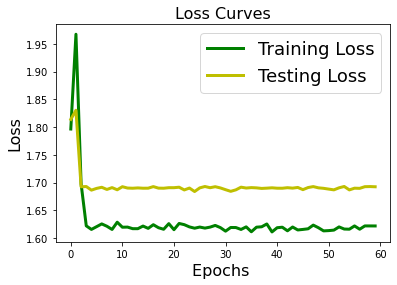

In [28]:
# #Tracer  la courbe   de la fonction de perte du model pour training et testing 
plt.plot(history.history['loss'], 'g', linewidth=3.0, label='Training Loss')
plt.plot(history.history['val_loss'], 'y', linewidth=3.0, label='Testing Loss')
plt.legend(fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

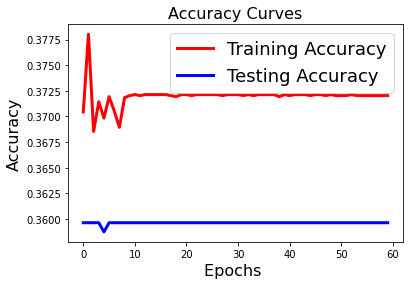

In [29]:
#Tracer  la courbe   Accuracy du model pour training et testing 
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'r',linewidth=3.0, label='Training Accuracy')
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0, label='Testing Accuracy')
plt.legend(fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)